### Principal Component Analysis (Unsupervised)

PCA aims to find the directions of maximum variance in a high-dimensional dataset and projects these into a new subspace with equal or fewer dims. The orthogonal axes (PC's) on the new subspace can be interpreted as the directions of maximum variance  given the constraint that the new feature axes are orthogonal (uncorrelated) to each other. 

The first PC will have the max variance and all consequent PC's will have the latgest possible variance given that they are uncorrelated (orthogonal) to the other PC's. PCA directions are highly sensitive to data scaling so we need to **standardize the features prior to PCA** if the features were measured on different scaled and we want to assign equal importance to all features.

+ Step 1: --> standardize the d-dim dataset
+ Step 2: --> construct covariance matrix
+ Step 3: --> decompose the covariance matrix into its eigenvectors and eigenvalues
+ Step 4: --> select k eigenvectors that correspond to the k largest eigenvalues where k = the subspace dim
+ Step 5: --> construct a projection matrix W from the top k eigenvectors
+ Step 6: --> transform the d-dim input dataset X using the projection matrix W to obtain a new k-dim subspace.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sys
sys.path.insert(0, 'helper_functions/')

In [2]:
df_wine = pd.read_csv('https://raw.githubusercontent.com/rasbt/python-machine-learning-book/master/code/datasets/wine/wine.data', header=None)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 
                   'Alcalinity of ash', 'Magnesium', 'Total phenols', 
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 
                   'Proline']
df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
# Test, train set
X = df_wine.iloc[:, 1:].values 
y = df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, 
                                                    random_state = 0)

### Manually construct a PCA. Steps: 

In [5]:
# Step 1: --> standardize the d-dim dataset
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

Manually construct a PCA: 
Step 2: construct a $d x d$ **symmetric covariance matrix** where $d$ is the no of dims in the dataset and stores the pairwise covariances between the features.

After step 1 we standardized and the sample means are zero. A positive covariance between 2 features indicate that they increase of decrease together. A negative covariance mean that the features vary in opposite directions.

In [6]:
# Step 2: --> construct covariance matrix
from data_manipulation import calculate_covariance_matrix
cov_mat = calculate_covariance_matrix(X_train_std)
# cov_mat = np.cov(X_train_std.T)

The eigenvectors of the co-variance matrix represent the PC's (the directions of maximum variance), whereas the corresponding eigenvalues will define their magnitide. In the wineset we would obtain 13 x 13 eigenvectors and eigenvalues from the covariance matrix.

In [7]:
# Step 3: -->decompose the covariance matrix into its eigenvectors and eigenvalues
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

print('\nEigenvalues: \n%s. \ndefine the magnitude of the PCs. If we sum the \
Eigenvalues we have the total variance. Since the eigenvalues define the magnitude \
of the eigenvectors, we have to sort the eigenvalues by decreasing magnitude: \
we want the top k eigenvectors based in the values of their corresponding eigenvalues.'\
      % eigen_vals)

print('\nFirst Eigenvectors: \n%s \nrepresent the PCs (the directions of maximum variance)' \
      % eigen_vecs[0])


Eigenvalues: 
[4.8923083  2.46635032 1.42809973 1.01233462 0.84906459 0.60181514
 0.52251546 0.08414846 0.33051429 0.29595018 0.16831254 0.21432212
 0.2399553 ]. 
define the magnitude of the PCs. If we sum the Eigenvalues we have the total variance. Since the eigenvalues define the magnitude of the eigenvectors, we have to sort the eigenvalues by decreasing magnitude: we want the top k eigenvectors based in the values of their corresponding eigenvalues.

First Eigenvectors: 
[ 1.46698114e-01  5.04170789e-01 -1.17235150e-01  2.06254611e-01
 -1.87815947e-01 -1.48851318e-01 -1.79263662e-01 -5.54687162e-02
 -4.03054922e-01 -4.17197583e-01  2.75660860e-01  4.03567189e-01
  4.13320786e-04] 
represent the PCs (the directions of maximum variance)


cum_var_explained [0.37329648 0.56148574 0.67045365 0.74769754 0.81248349 0.85840362
 0.89827298 0.92349212 0.94607393 0.96438317 0.98073654 0.99357924
 1.        ]


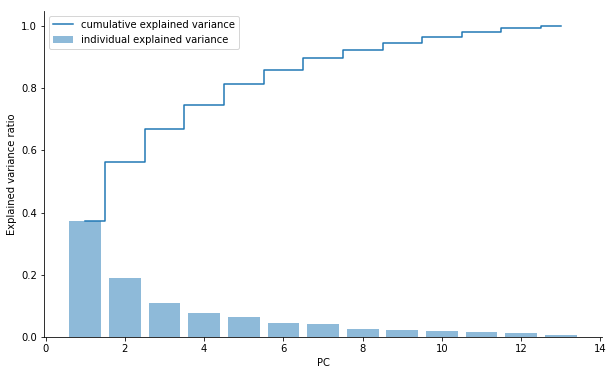

In [8]:
# Step 4: --> select k eigenvectors corresponding to k-largest eigenvalues 
# where k = the subspace dim. Let's first plot
total = sum(eigen_vals)
var_explained = [(x / total) for x in sorted(eigen_vals, reverse=True)]
cum_var_explained = np.cumsum(var_explained)
print ('cum_var_explained %s' % cum_var_explained)

from utilities import remove_borders
fig, ax = plt.subplots(figsize=[10,6])

ax.bar(range(1, 14), var_explained, alpha=0.5, align='center',
       label='individual explained variance')
ax.step(range(1, 14), cum_var_explained, where='mid', 
        label='cumulative explained variance')
ax.set(ylabel = 'Explained variance ratio', xlabel = 'PC')
ax.legend(loc='best')
remove_borders(ax)

In [9]:
## Now sort the eigenpairs by decreasing order of the eigenvalues:
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
               for i in range(len(eigen_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(reverse=True)

In [10]:
# top 2 eigen_pairs
eigen_pairs[:2]

[(4.89230830327374,
  array([ 0.14669811, -0.24224554, -0.02993442, -0.25519002,  0.12079772,
          0.38934455,  0.42326486, -0.30634956,  0.30572219, -0.09869191,
          0.30032535,  0.36821154,  0.29259713])),
 (2.466350315759229,
  array([ 0.50417079,  0.24216889,  0.28698484, -0.06468718,  0.22995385,
          0.09363991,  0.01088622,  0.01870216,  0.03040352,  0.54527081,
         -0.27924322, -0.174365  ,  0.36315461]))]

In [11]:
# Step 5: --> construct a projection matrix W from the top 2 k eigenvectors

# In this case: a 13 * 2 projection matrix W from the top 2 eigenvectors.

W = np.hstack((eigen_pairs[0][1][:, np.newaxis], 
               eigen_pairs[1][1][:, np.newaxis]))
print('Matrix W:\n', W)

Matrix W:
 [[ 0.14669811  0.50417079]
 [-0.24224554  0.24216889]
 [-0.02993442  0.28698484]
 [-0.25519002 -0.06468718]
 [ 0.12079772  0.22995385]
 [ 0.38934455  0.09363991]
 [ 0.42326486  0.01088622]
 [-0.30634956  0.01870216]
 [ 0.30572219  0.03040352]
 [-0.09869191  0.54527081]
 [ 0.30032535 -0.27924322]
 [ 0.36821154 -0.174365  ]
 [ 0.29259713  0.36315461]]


In [12]:
# Step 6: -->transform d-dim input dataset X using the projection matrix W 
# to obtain a new k-dim subspace

# Take sample vector from the standardized training set :

print ('first element from standardized training set:\n{}\ntransformed into \
PC:\n{}'.format(X_train_std[0] ,X_train_std[0].dot(W)))

first element from standardized training set:
[ 0.91083058 -0.46259897 -0.01142613 -0.82067872  0.06241693  0.58820446
  0.93565436 -0.7619138   0.13007174 -0.51238741  0.65706596  1.94354495
  0.93700997]
transformed into PC:
[2.59891628 0.00484089]


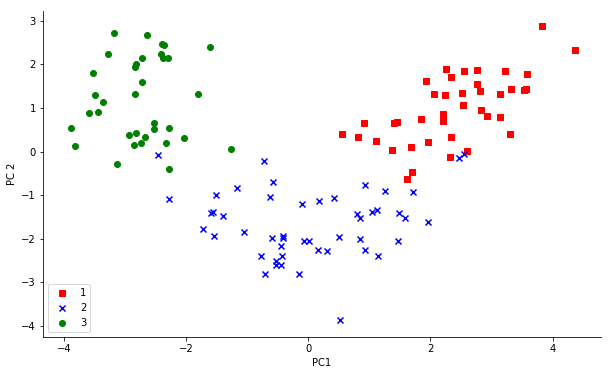

In [13]:
# tranform the whole set:
X_train_pca =  X_train_std.dot(W)
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

fig, ax = plt.subplots(figsize=[10,6])

for l,c,m in zip(np.unique(y_train), colors, markers):
    ax.scatter(X_train_pca[y_train == l, 0], 
               X_train_pca[y_train == l, 1], 
               c=c, label=l, marker=m)
ax.set(xlabel = 'PC1', ylabel = 'PC 2')
ax.legend(loc='lower left')
remove_borders(ax)